<a href="https://colab.research.google.com/github/sayuru-j/deeplearning-project/blob/main/BreastCancerDetectionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Datasets and clean the duplicates**

In [1]:
#install kaggle
!pip install -q kaggle


In [2]:
#upload kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ranindusachintha","key":"b55fef9b4f9c36985ebd73074540c1a1"}'}

In [3]:
#ceate kaggle directory in user's default path
!mkdir ~/.kaggle

In [4]:
#copy kaggle API key to kaggle directory
!cp kaggle.json ~/.kaggle/

In [5]:
#Permission grant for the json file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#import the kaggle breast cancer dataset
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.10G/3.10G [00:25<00:00, 131MB/s]
100% 3.10G/3.10G [00:25<00:00, 128MB/s]


In [7]:
#unzip the imported kaggle breast cancer dataset
!unzip breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [8]:
#ceate dataset directory
!mkdir /content/dataset/


In [9]:
#ceate dataset/benign directory
!mkdir /content/dataset/benign/

In [10]:
#ceate dataset/malignant directory
!mkdir /content/dataset/malignant/

In [11]:
#remove the unwanted directory
!rm -rf /content/IDC_regular_ps50_idx5

In [12]:
#import necessary Dependencies
import glob
import shutil
import os
import math
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [13]:
#create benign image dataset without duplicates

# Get all png files from group of folders
png_files = glob.glob("/content/**/0/*.png", recursive=True)[:20000]

# Move the png files to the dataset folder and filter duplicates
for png_file in png_files:
    if not os.path.exists("/content/dataset/benign/" + os.path.basename(png_file)):
        shutil.move(png_file, "/content/dataset/benign/")


In [14]:
#create malignant image dataset without duplicates

# Get all png files in group of folders
png_files = glob.glob("/content/**/1/*.png", recursive=True)[:20000]

# Move the png files to the dataset folder
for png_file in png_files:
    if not os.path.exists("/content/dataset/malignant/" + os.path.basename(png_file)):
        shutil.move(png_file, "/content/dataset/malignant/")

In [15]:
#count benign and malignant images

# Get all PNG files in the dataset benign folder
png_files = glob.glob("/content/dataset/benign/*.png")

# Count the number of PNG files
num_png_files = len(png_files)
print(num_png_files)

# Get all PNG files in the dataset malignant folder
png_files = glob.glob("/content/dataset/malignant/*.png")

# Count the number of PNG files
num_png_files = len(png_files)
print(num_png_files)


20000
20000


In [16]:
#check the dataset size
!du -h /content/dataset/

157M	/content/dataset/malignant
154M	/content/dataset/benign
311M	/content/dataset/


In [17]:
#create Constants
BATCH_SIZE = 32
IMG_SIZE = 50
CHANNELS=3
EPOCHS=20

In [18]:
# Import image data into tensorflow dataset object
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    seed=111,
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 40000 files belonging to 2 classes.


In [19]:
#store class names
class_names = dataset.class_names
class_names

['benign', 'malignant']

In [20]:
#check data set batch count
len(dataset)

1250

In [21]:
#preview first batch data
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 50, 50, 3)
[0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0]


In [22]:
#preview first batch as tensor
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[232. 215. 229.]
  [228. 187. 208.]
  [226. 156. 184.]
  ...
  [244. 244. 244.]
  [236. 214. 225.]
  [235. 226. 229.]]

 [[237. 218. 226.]
  [232. 183. 203.]
  [223. 138. 173.]
  ...
  [243. 236. 240.]
  [206. 157. 188.]
  [227. 211. 221.]]

 [[242. 243. 243.]
  [234. 200. 216.]
  [223. 132. 165.]
  ...
  [234. 209. 221.]
  [220. 177. 199.]
  [241. 241. 245.]]

 ...

 [[245. 243. 244.]
  [242. 246. 245.]
  [244. 249. 245.]
  ...
  [244. 240. 241.]
  [240. 236. 242.]
  [234. 216. 224.]]

 [[241. 242. 249.]
  [245. 248. 245.]
  [243. 248. 246.]
  ...
  [235. 230. 231.]
  [239. 230. 235.]
  [234. 215. 222.]]

 [[245. 246. 245.]
  [241. 241. 243.]
  [246. 249. 247.]
  ...
  [242. 235. 239.]
  [230. 208. 220.]
  [237. 225. 234.]]], shape=(50, 50, 3), dtype=float32)


In [23]:
#preview first batch as numpy array
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[128.  94. 142.]
  [121.  89. 136.]
  [131.  91. 140.]
  ...
  [164.  98. 139.]
  [142.  92. 143.]
  [162. 126. 170.]]

 [[150. 102. 149.]
  [158. 107. 157.]
  [164. 121. 161.]
  ...
  [193. 129. 167.]
  [190. 123. 162.]
  [193. 110. 148.]]

 [[194. 142. 177.]
  [185. 129. 172.]
  [172. 118. 164.]
  ...
  [181. 132. 169.]
  [177. 123. 167.]
  [196. 133. 170.]]

 ...

 [[168. 118. 160.]
  [194. 146. 182.]
  [170. 129. 169.]
  ...
  [166. 123. 164.]
  [212. 187. 204.]
  [232. 223. 234.]]

 [[134. 113. 154.]
  [181. 165. 185.]
  [202. 178. 202.]
  ...
  [198. 136. 174.]
  [191. 131. 171.]
  [199. 168. 194.]]

 [[163. 114. 157.]
  [189. 152. 185.]
  [140.  97. 149.]
  ...
  [199. 161. 188.]
  [199. 136. 172.]
  [190. 111. 153.]]]


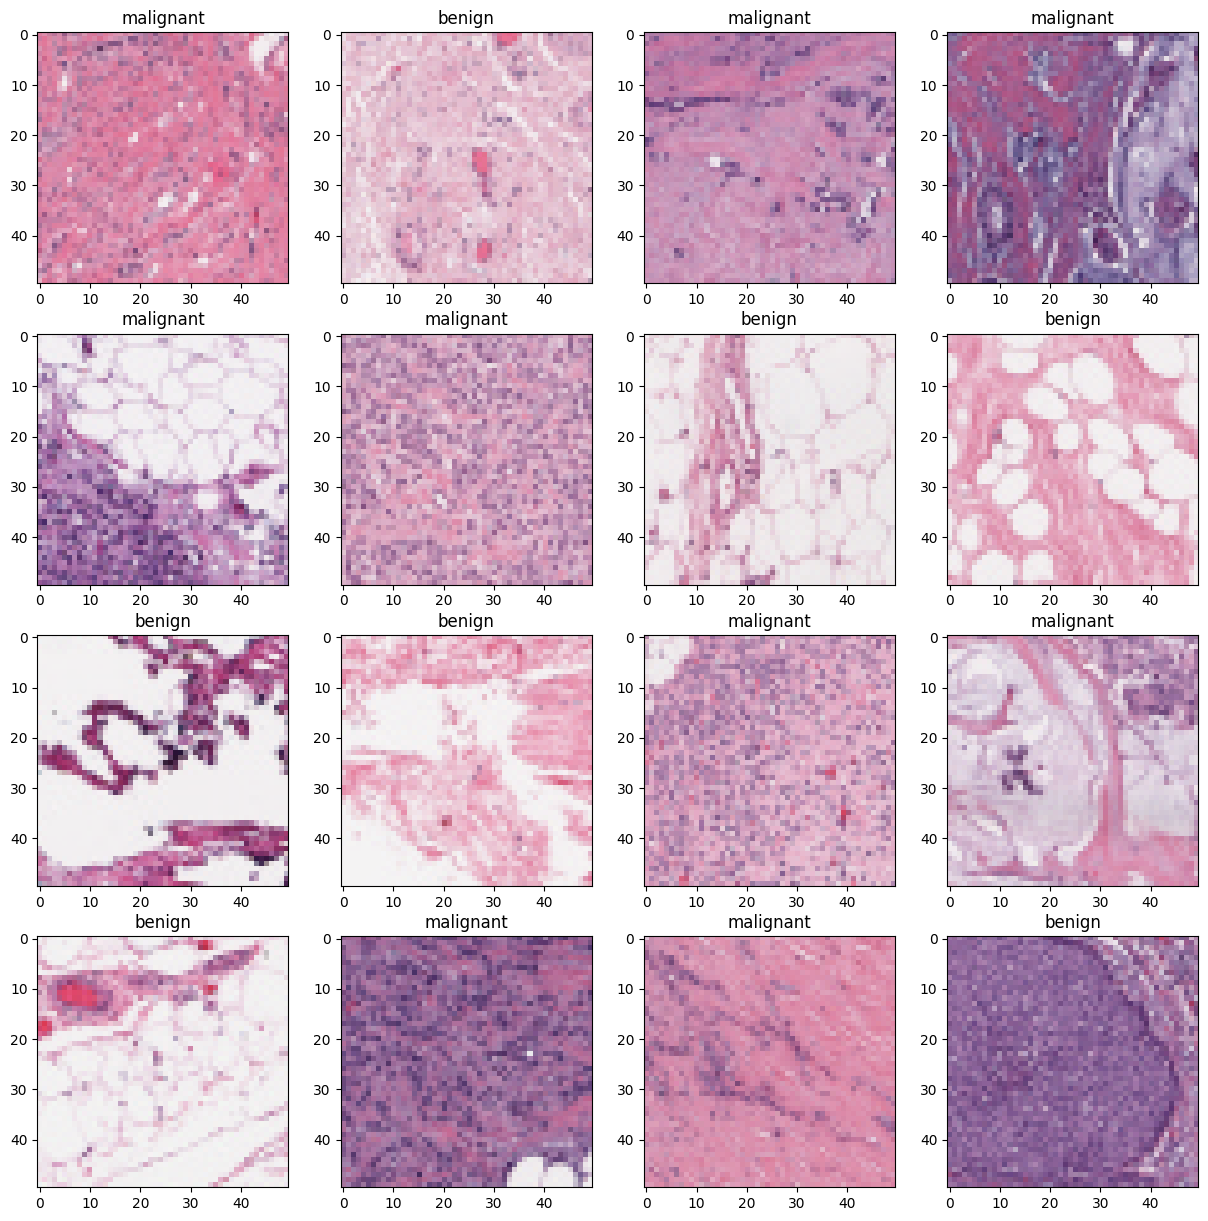

In [24]:
#Visualize images
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])


# **Split Dataset**

In [25]:
#define train dataset size
train_ds = dataset.take(int(len(dataset)*0.8))
len(train_ds)

1000

In [26]:
#define non-train dataset size
rest_ds = dataset.skip(int(len(dataset)*0.8))
len(rest_ds)

250

In [27]:
#define validation dataset size
val_ds = rest_ds.take(int(len(rest_ds)*0.5))
len(val_ds)

125

In [28]:
#define test dataset size
test_ds = rest_ds.skip(int(len(rest_ds)*0.5)).take(int(len(rest_ds)))
len(test_ds)

125

In [29]:
#define train, validation, test dataset size using function
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=200)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [30]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [31]:
len(train_ds)

1000

In [32]:
len(val_ds)

125

In [33]:
len(test_ds)

125

Cache, Shuffle, and Prefetch the Dataset

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
#Creating a Layer for Resizing and Normalization
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [36]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [37]:
#Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


**Model Architecture**

In [38]:
input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid'),
])

model.build(input_shape=input_shape)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 50, 50, 3)           0         
                                                                 
 conv2d (Conv2D)             (32, 48, 48, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 24, 24, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 22, 22, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 11, 11, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 9, 9, 64)           

**Compiling the Model**

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/20
1000/1000 [==============================] - 207s 180ms/step - loss: 0.5201 - accuracy: 0.7515 - val_loss: 0.4456 - val_accuracy: 0.8027
Epoch 2/20
1000/1000 [==============================] - 176s 176ms/step - loss: 0.4562 - accuracy: 0.7962 - val_loss: 0.4285 - val_accuracy: 0.8140
Epoch 3/20
1000/1000 [==============================] - 161s 161ms/step - loss: 0.4418 - accuracy: 0.8029 - val_loss: 0.4459 - val_accuracy: 0.8050
Epoch 4/20
1000/1000 [==============================] - 168s 168ms/step - loss: 0.4330 - accuracy: 0.8082 - val_loss: 0.4537 - val_accuracy: 0.7915
Epoch 5/20
1000/1000 [==============================] - 162s 162ms/step - loss: 0.4256 - accuracy: 0.8116 - val_loss: 0.4223 - val_accuracy: 0.8130
Epoch 6/20
1000/1000 [==============================] - 161s 161ms/step - loss: 0.4122 - accuracy: 0.8204 - val_loss: 0.3946 - val_accuracy: 0.8325
Epoch 7/20
1000/1000 [==============================] - 162s 162ms/step - loss: 0.4032 - accuracy: 0.8243 - val_

In [49]:
scores = model.evaluate(test_ds)

125/125 [==============================] - 5s 42ms/step - loss: 0.3751 - accuracy: 0.8422


In [50]:
scores

[0.3751107454299927, 0.8422499895095825]

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

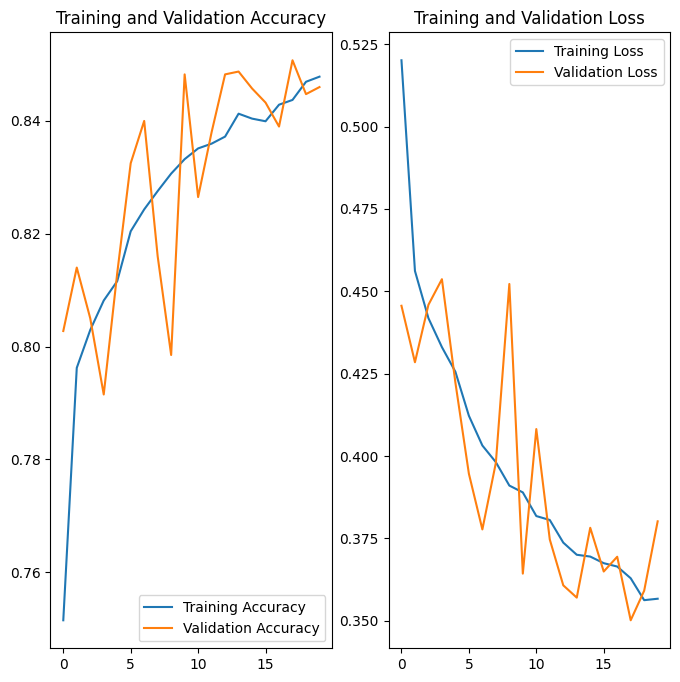

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Plot a confusion matrix

plot_confusion_matrix(clf, X_test, y_test)
confusion_matrix = plot_to_str()